## good old perceptron from scratch

tiny toy problem, no test data, no hidden layer, square loss
- implement full-batch vectorized gradient descent
- play with parameters and target (change to [0,1,1,0])
- add one hidden layer with sigmoid
- loop on different step sizes

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# main parameters
iterNum = 10000
stepSize = 0.1

# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (2.0, 2.0)

bounded smooth non-linearity: 
$\sigma(x) = \frac{1}{1+\exp(-x)},\quad\sigma'(x) = \sigma(x)(1-\sigma(x))$

In [17]:
# compute sigmoid
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)

In [18]:
# input dataset
X = np.array([  [0,0,1,1],
                [0,1,0,1],
                [1,1,1,1] ])
print(X.shape)
# output dataset            
Y = np.array([[0,0,1,1]])
trainNum = Y.shape[1]  
print(Y.shape)

(3, 4)
(1, 4)


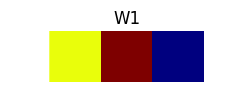

In [19]:
# initialize weights randomly with mean 0
# np.random.seed(1)
W1 = 2 * np.random.random((1,3)) - 1
# visualize weights
plt.imshow(W1,interpolation = 'none')
plt.axis('off')
plt.title('W1')

activation (no bias): $a_{\ell} = Wx_{\ell-1}$, output: $x_{\ell} = \sigma(a_{\ell})$  

square loss: $\frac{1}{2N} \sum_{n=1}^{N} \|x_1^{(n)}-y^{(n)}\|^2$

In [23]:
# training with full-batch fixed step-size gradient descent
for iter in range(iterNum):

    # forward propagation on all training data
    X0 = X
    A1 = np.dot(W1,X0)  
    X1 = sigmoid(A1)

    # back propagation of errors
    G1 = X1 - Y
    H1  = G1 * sigmoid_output_to_derivative(X1)
    
    # Udpating weights
    W1 -= stepSize * np.dot(H1,X.T) / trainNum

In [24]:
print("Prediction vs. target on training set:")
print(X1)
print(Y)

Prediction vs. target on training set:
[[ 0.03701253  0.03001293  0.97562898  0.96990437]]
[[0 0 1 1]]


In [ ]:
# visualize final weights
plt.imshow(W1,interpolation = 'none')
plt.axis('off')
plt.title('W1')